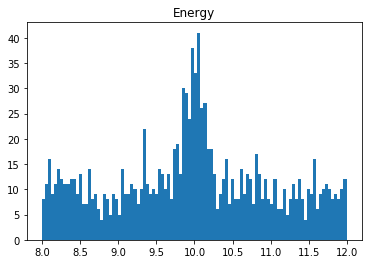

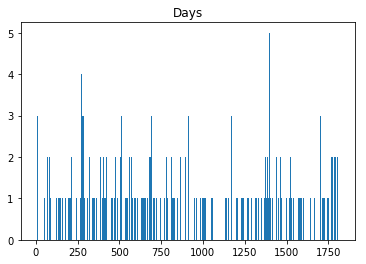

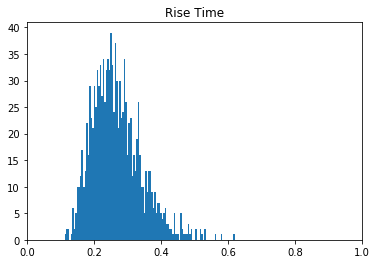

In [72]:
#Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

#Load in the data - May want to add try/catch block
data = np.loadtxt('../data/data_for_testing_00.dat',)
#Load Columns
day = data[:,0]
energy = data[:,1]
riseTime = data[:,2]

#Test Plot 1 - Plotting a histo of the energy vs time
plt.hist(energy, bins=100)
plt.title('Energy')
plt.show()

plt.hist(day, bins=int(max(day)))
plt.title('Days')
plt.show()

plt.hist(riseTime, bins=1000)
plt.title('Rise Time')
plt.xlim([0,1])
plt.show()


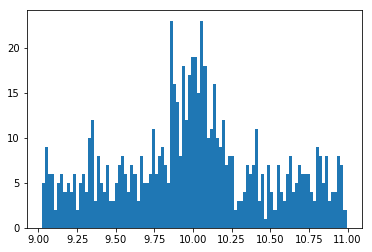

In [101]:
#Find any peaks on the peak
#First going to plot a historgram from 'start' to 'end'
start = 9.0
end = 11.0

peak = np.array([])
for i in energy:
    if(i>start and i<end):
        peak = np.append(peak, [i])

plt.hist(peak, bins=100)
plt.show()

33


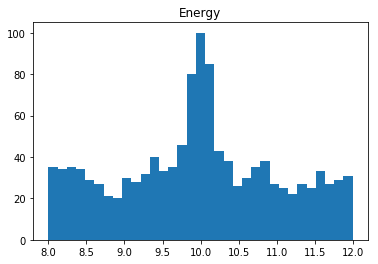

2400


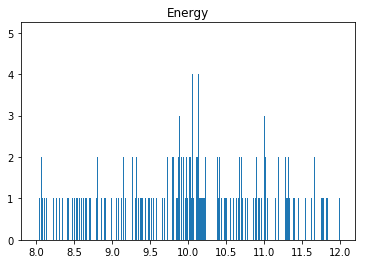

1.4816180057250001
10.62658569182611
0.13942559244260833
14


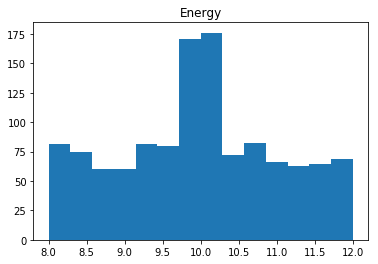

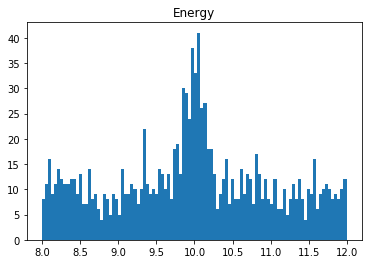

In [77]:
#First using Sturges Rule to find a better bins - Bins = log2(N+1)
n = len(energy)
Bin_S = int(1 + 3.22*np.log2(n))

print(Bin_S)
plt.hist(energy, bins=Bin_S)
plt.title('Energy')
plt.show()

#Second is trying Rice's Law
Bin_R = 2*n^(1/3)

print(Bin_R)
plt.hist(energy, bins=Bin_R)
plt.title('Energy')
plt.show()


#Both of these were no good
#Last Attempt is to use Freedman–Diaconis rule - bin = 2(IQR(x)/cuberoot(n))
q75, q25 = np.percentile(energy, [75 ,25])
iqr = q75 - q25
print(iqr)
print(np.cbrt(n))
print(iqr/np.cbrt(n))

width = 2 * (iqr/np.cbrt(n))
Bin_FD = int(np.ptp(energy) / width)

print(Bin_FD)
plt.hist(energy, bins=Bin_FD)
plt.title('Energy')
plt.show()

#This alos does not work for analysis - Going to stick with using 100 for now

plt.hist(energy, bins=100)
plt.title('Energy')
plt.show()

601
[ 8. 11. 16.  9. 11. 14. 12. 11. 11. 12. 12.  9. 13.  7.  7. 14.  8.  9.
  6.  4.  9.  8.  5.  9.  8.  5. 14.  9.  9. 11. 10.  7. 10. 22. 11.  9.
 10.  9. 14. 13. 10. 13.  8. 18. 19. 13. 30. 29. 24. 38. 33. 41. 26. 27.
 18. 18. 13.  6.  9. 12. 16.  7. 12.  8.  8. 14.  9. 13. 12.  7. 17. 13.
  8. 12.  8.  7. 12.  6.  6. 10.  5.  8. 11.  8. 12.  8.  4. 10.  9. 16.
  6.  9. 10. 11. 10.  8.  9.  8. 10. 12.]


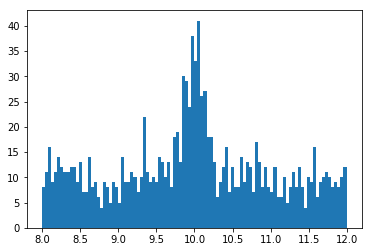

In [87]:
#By eyeballing this plot - it seems that the peak is between 9.75 and 10.25
count = 0
for i in energy:
    if(i>start and i<end):
        count=count+1
        
print(count)#This is the estimated count of the events in the peak

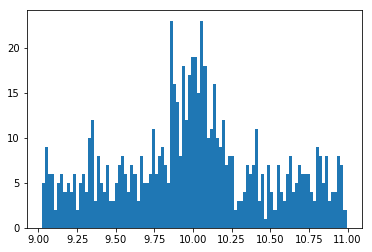

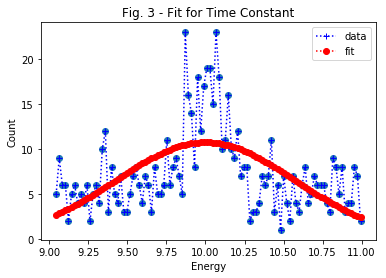

In [107]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

y, x, _ = plt.hist(peak,bins=100)
plt.show()

x = x[1:] 

n = len(peak)                     #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

plt.plot(x, y, 'o')

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

In [ ]:
#The next step is to estimate the amount of data points in the peak that is shown in the graph above

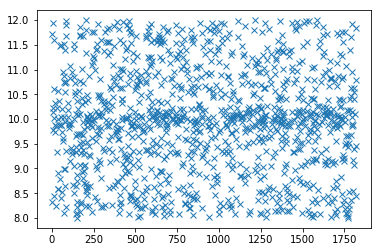

In [76]:
#Attempt 1 to filter out background noise - Using days data to create normalize energy data
#First plotting energy vs time(day)
plt.plot(day, energy, 'x')

In [ ]:
#The graph above shows that there is a dense region is the center (hovering around energy=10)
#This seems to be the peak, making the rest the background - seen as it consistently shows everyday
#Next step is too find the boundries of this band and attempt to extract these data points from the origional set